In [21]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset (assuming it's a CSV file)
df = pd.read_csv("./data/agile_dataset_ananth.csv")

# Convert date columns to datetime
df['sprint_start_date'] = pd.to_datetime(df['sprint_start_date'])
df['sprint_end_date'] = pd.to_datetime(df['sprint_end_date'])

# Create sprint length feature (days)
df['sprint_length'] = (df['sprint_end_date'] - df['sprint_start_date']).dt.days

# Drop original date columns
df.drop(['sprint_start_date', 'sprint_end_date'], axis=1, inplace=True)

# Convert categorical columns
df['test_automation'] = df['test_automation'].astype(int)  # Convert True/False to 1/0

# Reduce memory usage
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype(np.int32)  # Convert int64 to int32
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype(np.float32)  # Convert float64 to float32

# Define features (X) and target (y)
X = df.drop(columns=['completed_story_points'])
y = df['completed_story_points']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor with GPU support (if available)
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", 
                             tree_method="hist",
                             device="cuda",
                             n_estimators=200, 
                             learning_rate=0.1, 
                             max_depth=6, 
                             subsample=0.8, 
                             random_state=42)

# Train with early stopping
xgb_model.fit(X_train, y_train, 
              eval_set=[(X_test, y_test)], 
              verbose=True)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance on 20,000 rows:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


[0]	validation_0-rmse:12.06872
[1]	validation_0-rmse:10.88781
[2]	validation_0-rmse:9.82766
[3]	validation_0-rmse:8.87654
[4]	validation_0-rmse:8.02386
[5]	validation_0-rmse:7.26006
[6]	validation_0-rmse:6.57675
[7]	validation_0-rmse:5.96610
[8]	validation_0-rmse:5.42090
[9]	validation_0-rmse:4.93560
[10]	validation_0-rmse:4.50429
[11]	validation_0-rmse:4.12204
[12]	validation_0-rmse:3.78416
[13]	validation_0-rmse:3.48647
[14]	validation_0-rmse:3.22527
[15]	validation_0-rmse:2.99705
[16]	validation_0-rmse:2.79867
[17]	validation_0-rmse:2.62694
[18]	validation_0-rmse:2.47888
[19]	validation_0-rmse:2.35234
[20]	validation_0-rmse:2.24447
[21]	validation_0-rmse:2.15324
[22]	validation_0-rmse:2.07635
[23]	validation_0-rmse:2.01181
[24]	validation_0-rmse:1.95801
[25]	validation_0-rmse:1.91330
[26]	validation_0-rmse:1.87621
[27]	validation_0-rmse:1.84569
[28]	validation_0-rmse:1.82060
[29]	validation_0-rmse:1.79997
[30]	validation_0-rmse:1.78305
[31]	validation_0-rmse:1.76923
[32]	validation_

In [22]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("./data/agile_dataset_ananth.csv")

# Convert date columns to datetime
df['sprint_start_date'] = pd.to_datetime(df['sprint_start_date'])
df['sprint_end_date'] = pd.to_datetime(df['sprint_end_date'])

# Create sprint length feature (in days)
df['sprint_length'] = (df['sprint_end_date'] - df['sprint_start_date']).dt.days

# Drop original date columns
df.drop(['sprint_start_date', 'sprint_end_date'], axis=1, inplace=True)

# Convert boolean to integer (True/False → 1/0)
df['test_automation'] = df['test_automation'].astype(int)


In [23]:
# Convert int64 to int32 and float64 to float32 for efficiency
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype(np.int32)

for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype(np.float32)

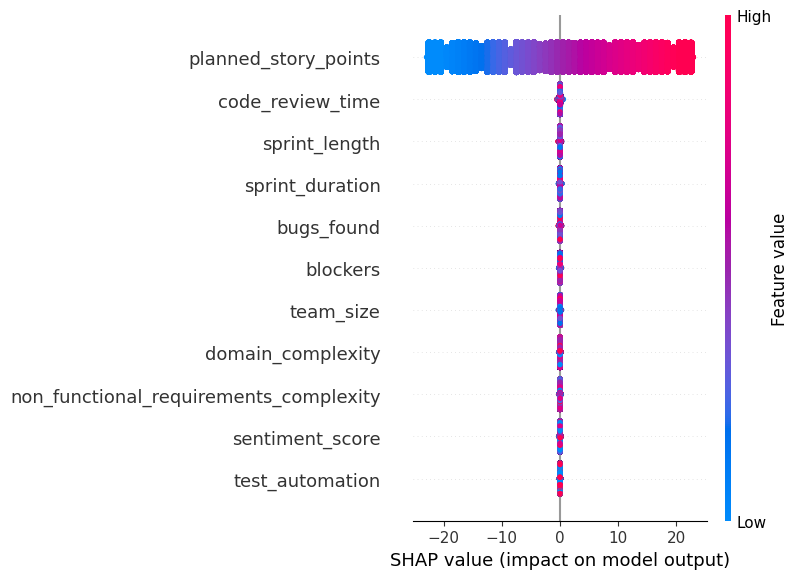

In [24]:
import xgboost as xgb
import shap


# Define features and target
X = df.drop(columns=['completed_story_points'])
y = df['completed_story_points']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", 
                             n_estimators=100, 
                             tree_method="hist", 
                             device="cuda")  # Ensure CUDA compatibility

xgb_model.fit(X_train, y_train)

# Explain model predictions using SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Plot feature importance
shap.summary_plot(shap_values, X_train)

In [25]:
# Define the model with hyperparameters
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1,
    reg_alpha=0.1,
    tree_method="hist",  # Use "gpu_hist" if GPU is available4
    device="cuda",
    random_state=42,
    eval_metric="rmse"  # ✅ Set eval_metric here, not in fit()
)

# Train the model with early stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    # early_stopping_rounds=10,  # ✅ Use this instead of callbacks
    verbose=True  # Enables logging
)


[0]	validation_0-rmse:12.06871
[1]	validation_0-rmse:10.88781
[2]	validation_0-rmse:9.82766
[3]	validation_0-rmse:9.82775
[4]	validation_0-rmse:9.82780
[5]	validation_0-rmse:8.87671
[6]	validation_0-rmse:8.02418
[7]	validation_0-rmse:7.26053
[8]	validation_0-rmse:6.57690
[9]	validation_0-rmse:6.57693
[10]	validation_0-rmse:6.57689
[11]	validation_0-rmse:5.96640
[12]	validation_0-rmse:5.96640
[13]	validation_0-rmse:5.96641
[14]	validation_0-rmse:5.42169
[15]	validation_0-rmse:5.42165
[16]	validation_0-rmse:4.93670
[17]	validation_0-rmse:4.50566
[18]	validation_0-rmse:4.12330
[19]	validation_0-rmse:3.78562
[20]	validation_0-rmse:3.48800
[21]	validation_0-rmse:3.22697
[22]	validation_0-rmse:2.99884
[23]	validation_0-rmse:2.99886
[24]	validation_0-rmse:2.80040
[25]	validation_0-rmse:2.62859
[26]	validation_0-rmse:2.48058
[27]	validation_0-rmse:2.35394
[28]	validation_0-rmse:2.24615
[29]	validation_0-rmse:2.24616
[30]	validation_0-rmse:2.15471
[31]	validation_0-rmse:2.07769
[32]	validation_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [26]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Performance:")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")



📊 Model Performance:
✅ MAE: 1.50
✅ RMSE: 1.71
✅ R² Score: 0.98


In [27]:
sample_input = np.array([[9, 10, 4, 17.37, 6, 2, 12, 0, 1, 1, 12]]) 
xgb_model.predict(sample_input)

array([7.538679], dtype=float32)

In [ ]:
# import joblib 
# # Save model
# joblib.dump(xgb_model, "xgb_model_1_mil_rows.pkl")

['xgb_model_1_mil_rows.pkl']

In [41]:
import joblib
import numpy as np


# Load model
loaded_model = joblib.load("xgb_model_1_mil_rows.pkl")

# Predict with new input
sample_input = np.array([[9, 17, 4, 17.37, 6, 2, 12, 0, 1, 1, 12]])  # Replace with real input
predicted_points = loaded_model.predict(sample_input)
print(f"Predicted Story Points: {int(predicted_points[0])}")


Predicted Story Points: 14
